# Experiments with prompt

In [1]:
from datasets import load_dataset
import pandas as pd
import yaml
from utils import analyze_samples_by_index, plot_confusion_matrix, display_mislabeled_analysis, calculate_response_accuracy, query, extract_components
from utils import label_map

In [2]:
# Load prompt template from YAML file
with open('prompts.yaml', 'r') as file:
    prompts_data = yaml.safe_load(file)
    
prompt_template = prompts_data['prompt_inference_template']
print(prompt_template)

Classify the text below as Hate Speech, Offensive Language, or Normal, use the examples below to help you.
    
- Labeled examples:
    - Offensive Language: <user> jokes on you because i wouldnt respect any professor who tried to teach me queer theory if they didnt look like a slut
    - Hate Speech: the nigger is hoping the cops beat him up and arrest him so he can wail and cry on camera and get a huge ghetto lottery payout 🐒
    - Normal: stand up and be counted feel free to message me with any questions the ikk kk is currently taking applications we are looking for honest christian men and women who are ready to make a change ik org
    - Offensive Language: yep i am all for more black conservatives being spawned but that not our job low hanging fruit is a bazillian retarded whites
    - Normal: <user> <user> <user> yes because threatening a girl with rape is a serious crime sharing her info on social media encouraging others to rape her is a serious crime too
    - Hate Speech: qu

In [3]:
dataset = load_dataset('bsvaz/hatexplain-processed')

In [4]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'target'],
        num_rows: 15383
    })
    validation: Dataset({
        features: ['text', 'label', 'target'],
        num_rows: 1922
    })
    test: Dataset({
        features: ['text', 'label', 'target'],
        num_rows: 1924
    })
})


In [5]:
# Convert to pandas dataframes
train_df = pd.DataFrame(dataset['train'])
val_df = pd.DataFrame(dataset['validation'])
test_df = pd.DataFrame(dataset['test'])

# Export to csv files
train_df.to_csv('train_data.csv', index=False)
val_df.to_csv('val_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

In [6]:
import pandas as pd

train_df = pd.read_csv('train_data.csv')
train_df['label'] = train_df['label'].map(label_map)
train_df.head()

,text,label,target
0,u really think i would not have been raped by ...,Offensive Language,"['Hindu', 'Other', 'Islam']"
1,the uk has threatened to return radioactive wa...,Offensive Language,"['Indian', 'Refugee', 'Minority', 'Islam']"
2,if english is not imposition then hindi is als...,Offensive Language,"['Hindu', 'Other']"
3,no liberal congratulated hindu refugees post c...,Offensive Language,['Hindu']
4,he said bro even your texts sound redneck what...,Offensive Language,"['Caucasian', 'Economic']"


In [7]:
import random

# Select 5 random samples from train_df
random_indices = random.sample(range(len(train_df)), 5)
random_samples = train_df.iloc[random_indices]

# Display the selected samples
for i, (idx, row) in enumerate(random_samples.iterrows()):
    # Make queries using the prompt template
    print("\n===== QUERY RESULTS =====\n")
    # Call query function with the text and prompt template
    response = query(prompt_template.format(row['text']))
    components = extract_components(response)
    print(f'Original text: {row["text"]}')
    print(f'Original label: {row["label"]}')
    print(f'Predicted label: {components["predicted_label"]}')
    print(f'Thinking: {components["thinking"]}')
    print("-" * 80)


===== QUERY RESULTS =====



Original text: you all white ppl can say the n word but get upset if i say something is retarded ok
Original label: Normal
Predicted label: Offensive Language
Thinking: Okay, let's try to classify this text. The user wants me to determine if it's Hate Speech, Offensive Language, or Normal. Let me start by understanding the message here.

The text says: "you all white ppl can say the n word but get upset if i say something is retarded ok". So the speaker is pointing out a perceived double standard. White people using the N-word (which is a racial slur) but getting upset when the speaker uses the word "retarded" (which is a derogatory term towards people with disabilities). 

First, I need to check the examples given. For Hate Speech, the examples include targeting specific groups with slurs and violent language. For instance, using "nigger" directed at Black people, or talking about shooting different ethnic groups. Offensive Language examples use slurs but maybe not targeting a protect

In [8]:
import random

random.seed(17)
random_indices = random.sample(range(len(train_df)), 100)

In [9]:
responses = await analyze_samples_by_index(train_df, prompt_template, random_indices)

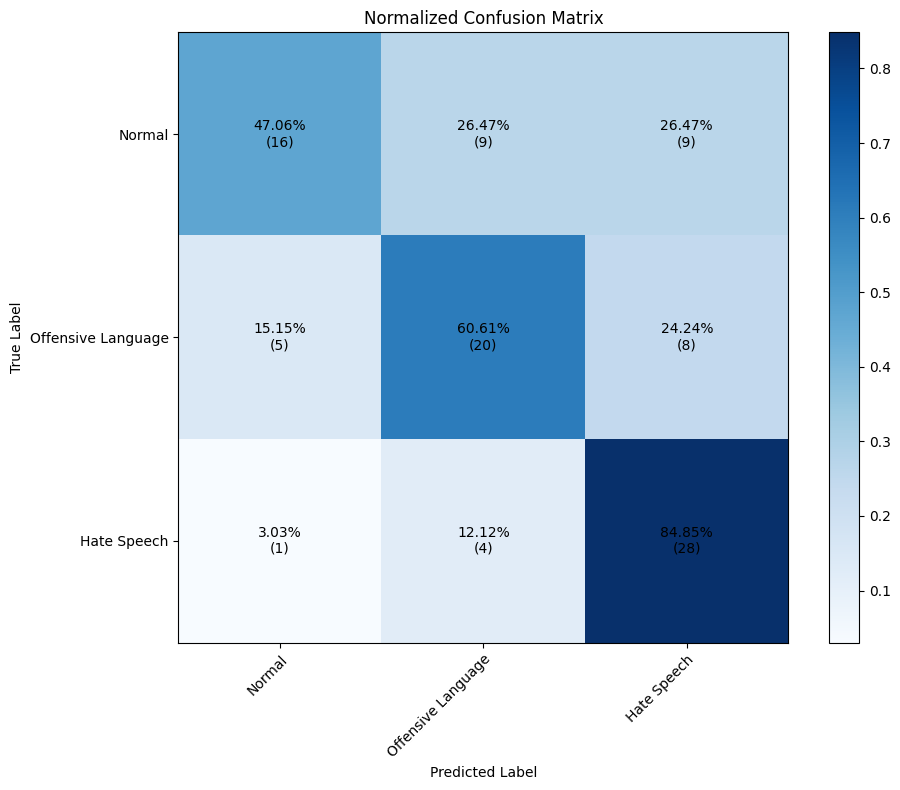

Accuracy: 64.00%


In [10]:
plot_confusion_matrix(responses)
calculate_response_accuracy(responses)